# Problem Definition


#### Predict House Prices

Dataset Info – kc_house_data.csv

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. 19 house features plus the price and the id columns, along with 21613 observations.


Column Info –

1.	id - a notation for a house
2.	date -Date house was sold
3.	price- Price is prediction target
4.	bedrooms- Number of Bedrooms/House
5.	bathrooms- Number of bathrooms/bedrooms
6.	sqft_living- square footage of the home
7.	sqft_lot- square footage of the lot
8.	floors-Total floors (levels) in house
9.	waterfront- House which has a view to a waterfront
10.	view-Has been viewed
11.	condition-How good the condition is ( Overall )
12.	grade-overall grade given to the housing unit, based on King County grading system
13.	sqft_above-square footage of house apart from basement
14.	sqft_basement-square footage of the basement
15.	yr_built-Built Year
16.	yr_renovated-Year when house was renovated
17.	zipcode-zip
18.	lat-Latitude coordinate
19.	long-Longitude coordinate
20.	sqft_living15-Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area-sqft_lot15
21.	lotSize area in 2015(implies-- some renovations)

## 1. Import libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True

In [2]:
# The attributes are delimited by comma. Lets load and view the few entries of the data.
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Lets get the shape of the data.
dataset.shape

(21613, 21)

In [4]:
# Lets get the datatype of the features.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
# Checking for missing value 
print ("Count of null values in each feature:\n",dataset.isna().sum())

Count of null values in each feature:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### Observations:

#### All the features are numeric (float/Int) except date. 
#### Eventhough the waterfront data type is integer, Actually it is of categorical nature (Yes/No).
#### view, grade, condition are ordinal.
#### Based on the count of each feature, it is evident that there is no missing values.
#### Each of the features have different scales. Standardization should be done before evaluation.
#### ID is just a number for identifcation. it will not be of use for our evaluation.
#### Lets convert the date from object to datetime. Date is not going to be of much use separately as this data is only for a year. If the data covers the details across the years (say some 5 to 10 years) then we might need to consider the date (mostly the year) seperately. Here we have 'yr_built' and 'yr_renovated' feature. So lets combine these three features to get age rather than dropping the whole value of date.

In [6]:
# Convert date from object to datetime
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['age'] = dataset['date'].dt.year - dataset[["yr_built", "yr_renovated"]].max(axis=1)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [7]:
# Now Lets remove ID, date, yr_built and yr_renovated from the dataset as it will not be useful for evaluation. 

dataset.drop(['id','date', 'yr_built', 'yr_renovated'], axis=1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
age              21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


## 2. Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [8]:
# Lets summarize the distribution of each feature except ID and Date.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


### Observations:
#### Min, Max and mean values of features vary a lot. We will get better result by rescaling the data.
#### For some features, Mean and 50% vary a lot. This indicates the presence of outliers and skewness of data.

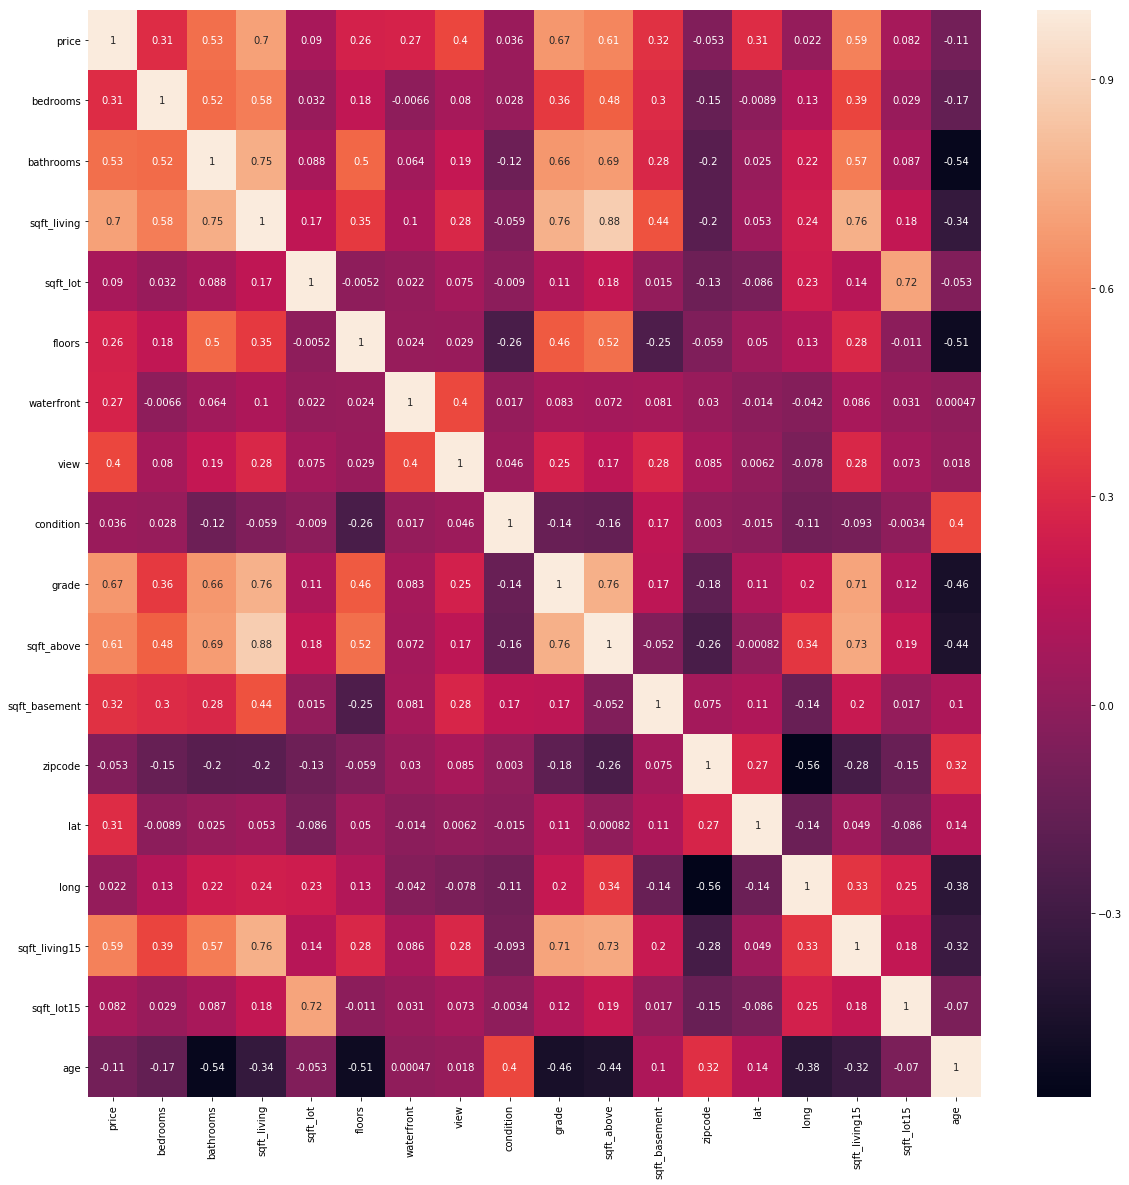

In [9]:
# Lets take a look of correlation between features.

CorrMat = dataset.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(CorrMat, annot=True)

In [10]:
CorrMat = dataset.corr()
indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
if len(indices) == 0:
    print ("All the attributes have some corrrelation between them.")
else:
    print ("There is no significant correlation between the following attributes: ")
    print ("------------------------------------------------------------------------")
    print(indices)
    print("====================================================================")
    indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
    indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and y == 0]
    if len(indices) == 0:
        print ('All the attributes have some corrrelation with price.')
    else:
        print ("There is no significant correlation between price and the following attributes: ", indices)

There is no significant correlation between the following attributes: 
------------------------------------------------------------------------
[('price', 'sqft_lot'), ('price', 'condition'), ('price', 'zipcode'), ('price', 'long'), ('price', 'sqft_lot15'), ('bedrooms', 'sqft_lot'), ('bedrooms', 'waterfront'), ('bedrooms', 'view'), ('bedrooms', 'condition'), ('bedrooms', 'lat'), ('bedrooms', 'sqft_lot15'), ('bathrooms', 'sqft_lot'), ('bathrooms', 'waterfront'), ('bathrooms', 'lat'), ('bathrooms', 'sqft_lot15'), ('sqft_living', 'condition'), ('sqft_living', 'lat'), ('sqft_lot', 'floors'), ('sqft_lot', 'waterfront'), ('sqft_lot', 'view'), ('sqft_lot', 'condition'), ('sqft_lot', 'sqft_basement'), ('sqft_lot', 'lat'), ('sqft_lot', 'age'), ('floors', 'waterfront'), ('floors', 'view'), ('floors', 'zipcode'), ('floors', 'lat'), ('floors', 'sqft_lot15'), ('waterfront', 'condition'), ('waterfront', 'grade'), ('waterfront', 'sqft_above'), ('waterfront', 'sqft_basement'), ('waterfront', 'zipcode'

In [11]:
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant positive correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and y == 0]
print ("There is significant positive correlation between price and the following attributes: ", indices)

There is significant positive correlation between the following attributes: 
------------------------------------------------------------------------
[('price', 'bedrooms'), ('price', 'bathrooms'), ('price', 'sqft_living'), ('price', 'floors'), ('price', 'waterfront'), ('price', 'view'), ('price', 'grade'), ('price', 'sqft_above'), ('price', 'sqft_basement'), ('price', 'lat'), ('price', 'sqft_living15'), ('bedrooms', 'bathrooms'), ('bedrooms', 'sqft_living'), ('bedrooms', 'floors'), ('bedrooms', 'grade'), ('bedrooms', 'sqft_above'), ('bedrooms', 'sqft_basement'), ('bedrooms', 'long'), ('bedrooms', 'sqft_living15'), ('bathrooms', 'sqft_living'), ('bathrooms', 'floors'), ('bathrooms', 'view'), ('bathrooms', 'grade'), ('bathrooms', 'sqft_above'), ('bathrooms', 'sqft_basement'), ('bathrooms', 'long'), ('bathrooms', 'sqft_living15'), ('sqft_living', 'sqft_lot'), ('sqft_living', 'floors'), ('sqft_living', 'waterfront'), ('sqft_living', 'view'), ('sqft_living', 'grade'), ('sqft_living', 'sqft

In [12]:
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
if len(indices) == 0:
    print ("There is no signigicant negative correleation between attributes.")
else:
    print ("There is significant negative correlation between the following attributes: ")
    print ("------------------------------------------------------------------------")
    print(indices)
print("====================================================================")
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and y == 0]

if len(indices) == 0:
    print ("price do not have negative correlation with any attributes.")
else:
    print ("There is significant negative correlation between price and the following attributes: ", indices)

There is significant negative correlation between the following attributes: 
------------------------------------------------------------------------
[('price', 'age'), ('bedrooms', 'zipcode'), ('bedrooms', 'age'), ('bathrooms', 'condition'), ('bathrooms', 'zipcode'), ('bathrooms', 'age'), ('sqft_living', 'zipcode'), ('sqft_living', 'age'), ('sqft_lot', 'zipcode'), ('floors', 'condition'), ('floors', 'sqft_basement'), ('floors', 'age'), ('condition', 'grade'), ('condition', 'sqft_above'), ('condition', 'long'), ('grade', 'zipcode'), ('grade', 'age'), ('sqft_above', 'zipcode'), ('sqft_above', 'age'), ('sqft_basement', 'long'), ('zipcode', 'long'), ('zipcode', 'sqft_living15'), ('zipcode', 'sqft_lot15'), ('lat', 'long'), ('long', 'age'), ('sqft_living15', 'age')]
There is significant negative correlation between price and the following attributes:  ['age']


### Observations:

#### Price have significant positive correlation with the below 12 features.

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']

#### sqft_living, grade, sqft_above, sqft_living15 and bathrooms are highly correlated. view, sqft_basement, bedrooms, lat are moderatly correlated. waterfront, floors, age are less correlated.

#### Price have significant negative correlation with age.

#### Price do not have any significant correlation with below features.
['sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15']

#### Lets not drop any features as of now. Lets decide using feature selector.

In [13]:
print ('Significant correlation of price with features listed in ascending order:')
CorrMat.loc[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'age', 'lat', 'sqft_living15'],'price'].sort_values(ascending = False)

Significant correlation of price with features listed in ascending order:


sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
age             -0.105672
Name: price, dtype: float64

In [14]:
# Now evaluating the multicolinearity between features.
# Dropping the insignificant features.
# CorrMat.drop(['price', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15'], axis=1, inplace = True)
# CorrMat.drop(['price', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15'], axis=0, inplace = True)
CorrMat.drop(['price'], axis=0, inplace = True)
CorrMat.drop(['price'], axis=1, inplace = True)

In [15]:
indices = np.where((CorrMat > 0.5) | (CorrMat < -0.5))
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
z = len(CorrMat)
lst = []
if len(indices) == 0:
    print ("There is no significant multicolinearity between the features.")
else:
    print ("Signigicant Multicollinearity exists between the following attributes: ")
    print ("------------------------------------------------------------------------")
    for i in range(z):
        lst.append([str(indices[i]), CorrMat.loc[indices[i]]])
    df = pd.DataFrame(lst, columns=['Features', 'Correlation'])
    df.sort_values(by = 'Correlation', ascending=False, inplace=True)
    print (df)

Signigicant Multicollinearity exists between the following attributes: 
------------------------------------------------------------------------
                            Features  Correlation
9      ('sqft_living', 'sqft_above')     0.876597
8           ('sqft_living', 'grade')     0.762704
10  ('sqft_living', 'sqft_living15')     0.756420
14           ('grade', 'sqft_above')     0.755923
2       ('bathrooms', 'sqft_living')     0.754665
16   ('sqft_above', 'sqft_living15')     0.731870
11        ('sqft_lot', 'sqft_lot15')     0.718557
15        ('grade', 'sqft_living15')     0.713202
5        ('bathrooms', 'sqft_above')     0.685342
4             ('bathrooms', 'grade')     0.664983
1        ('bedrooms', 'sqft_living')     0.576671
6     ('bathrooms', 'sqft_living15')     0.568634
12          ('floors', 'sqft_above')     0.523885
0          ('bedrooms', 'bathrooms')     0.515884
3            ('bathrooms', 'floors')     0.500653
13                 ('floors', 'age')    -0.505651
7    

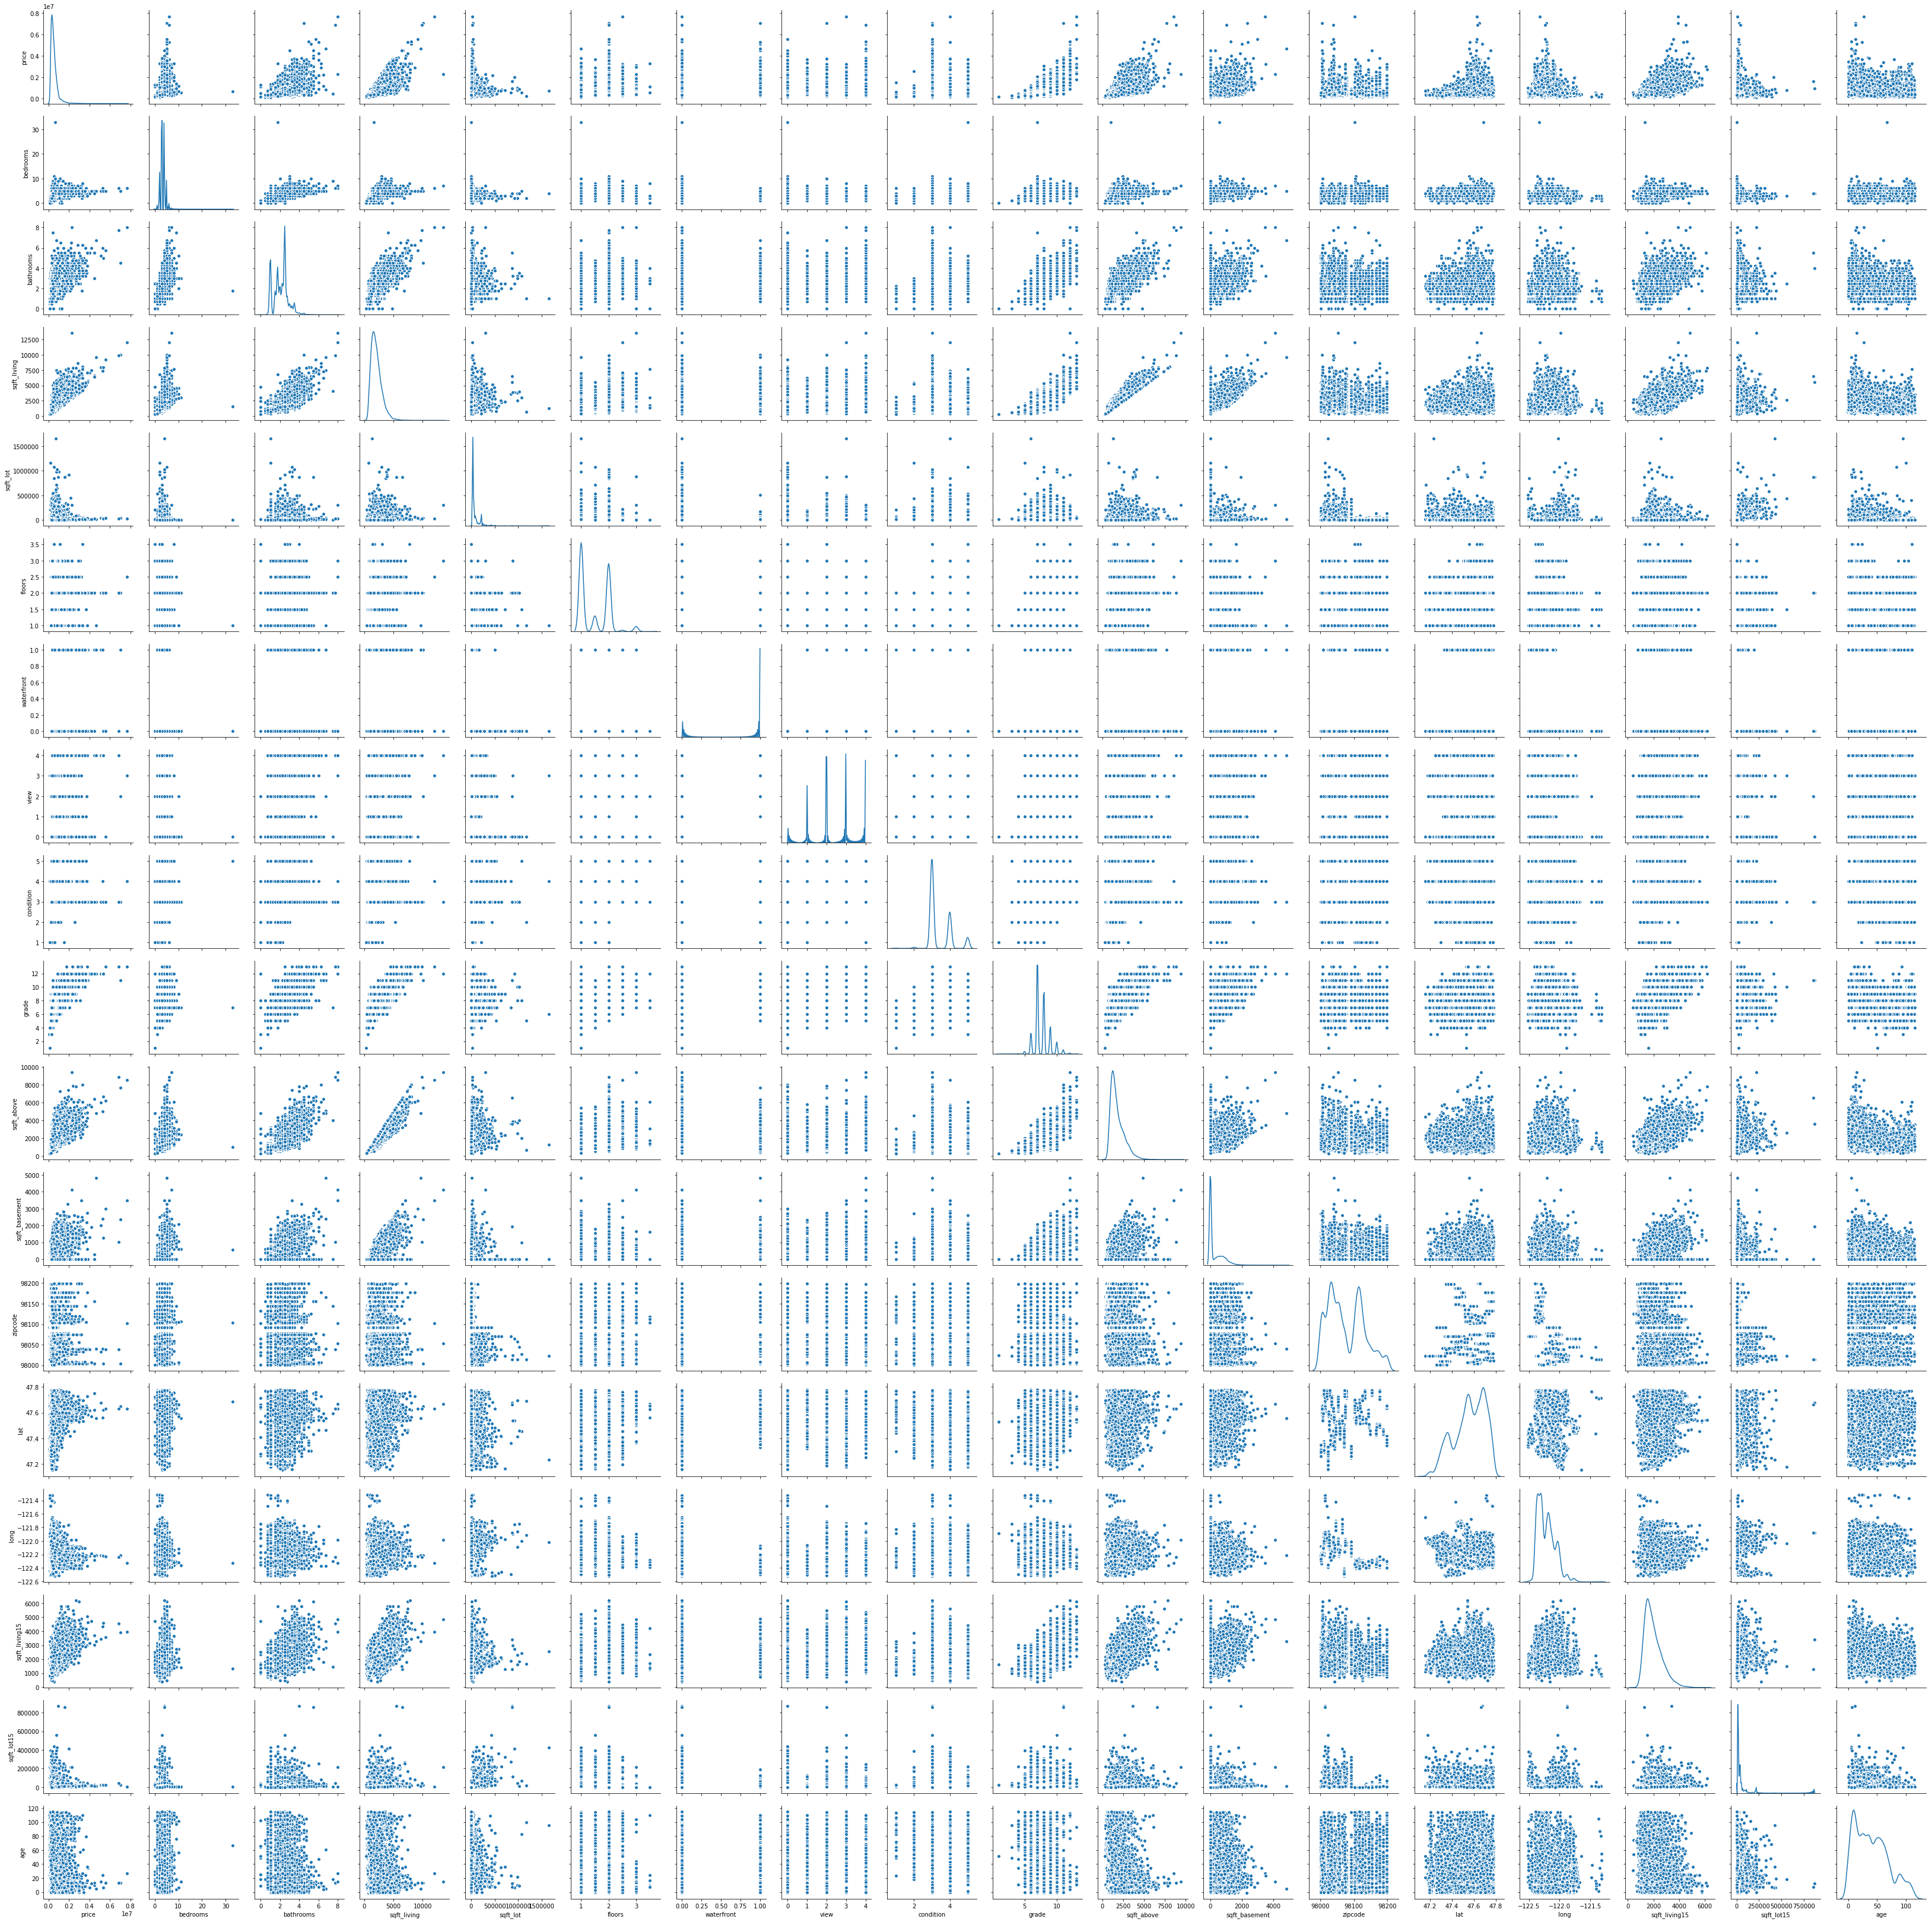

In [16]:
# Lets visualize the correlation through pairplot
sns.pairplot(dataset, diag_kind='kde')

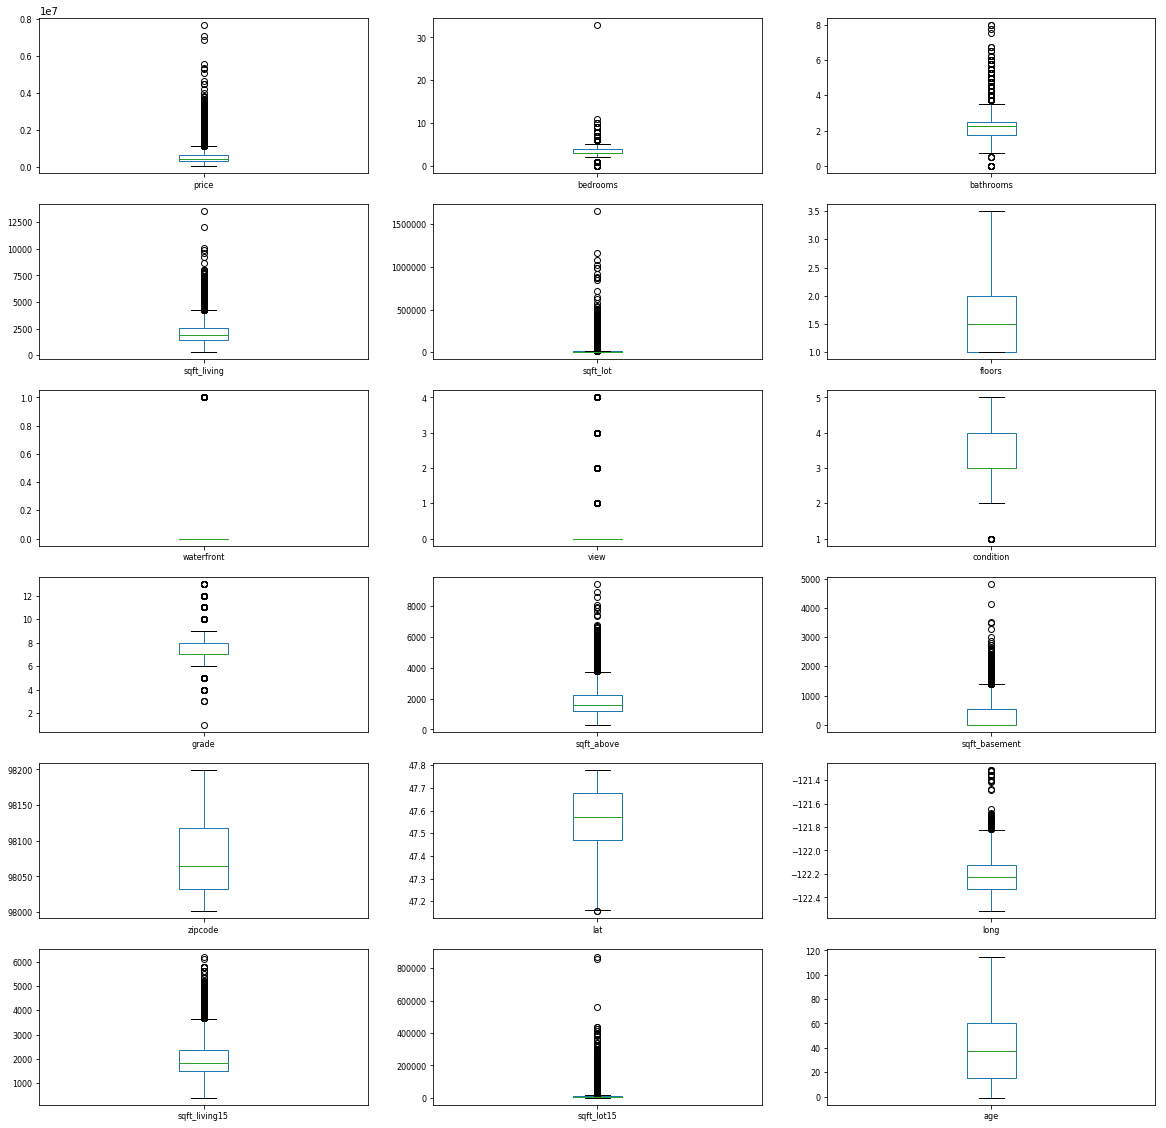

In [17]:
dataset.plot(kind='box', subplots=True, layout=(6,3), fontsize=8, figsize=(20,20))
plt.show()

### Observations:

#### There are mixed gaussians in the data. Multimode/clusters are seen in the data.
#### There are skewness in most of the features which indicates the outliers.
#### In box plot the outliers are clearly visible.
#### As there are more outliers... removing/imputing with mean/median will have negative effect.
#### Lets Standardize the data and apply different algorithms to evaluate.
#### Before that lets visualize the influence of features with target variable.

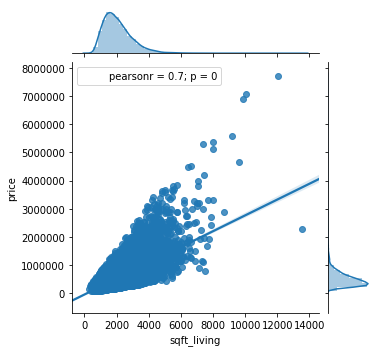

In [18]:
sns.jointplot(x="sqft_living", y="price", data=dataset, kind = 'reg', size = 5)

#### As expected, sqft_living is highly correlated with price. This should be a good predictor.

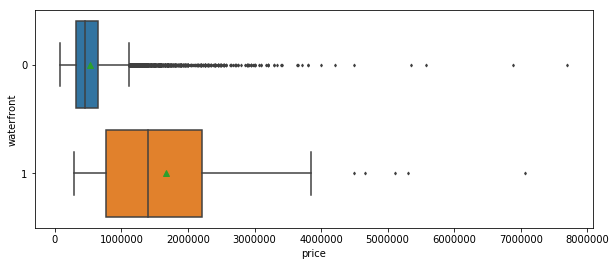

point biserial correlation r is 0.2663694340306021 with p = 0.0


In [19]:
# Lets check the categorical variable waterfront...
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sns.boxplot(y = 'waterfront',
          x = 'price',
          data = dataset,
          width = 0.8,
          orient = 'h',
          showmeans = True,
          fliersize = 2,
          ax = ax)
plt.show()

r, p = stats.pointbiserialr( dataset['waterfront'],
                           dataset['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

#### waterfont is lightly correlated with price. From correlation matrix we know that its correlation with price is 0.266

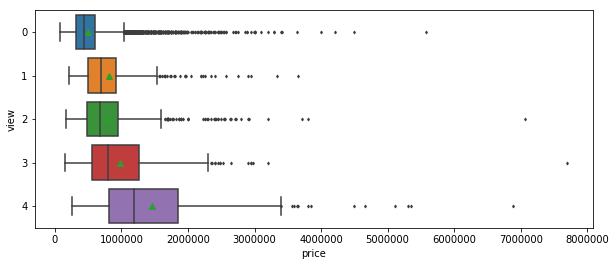

point biserial correlation r is 0.29393116417024306 with p = 0.0


In [20]:
# Now let look at the ordinal variables...(view, grade, conditions)
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sns.boxplot(y = 'view',
          x = 'price',
          data = dataset,
          width = 0.8,
          orient = 'h',
          showmeans = True,
          fliersize = 2,
          ax = ax)
plt.show()

r, p = stats.spearmanr( dataset['view'],
                      dataset['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

#### view is lightly correlated with price.

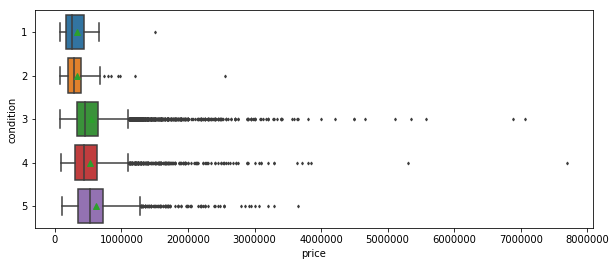

point biserial correlation r is 0.018489958301262526 with p = 0.006560828406548436


In [21]:
fig, ax = plt.subplots( figsize=( 10, 4 ) )
sns.boxplot(y = 'condition',
          x = 'price',
          data = dataset,
          width = 0.8,
          orient = 'h',
          showmeans = True,
          fliersize = 2,
          ax = ax)
plt.show()

r, p = stats.spearmanr( dataset['condition'],
                      dataset['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

#### condition have no correlation with price.

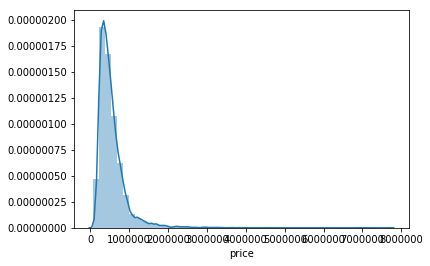

In [22]:
# Lets see the distribution on price.
sns.distplot( dataset.price )

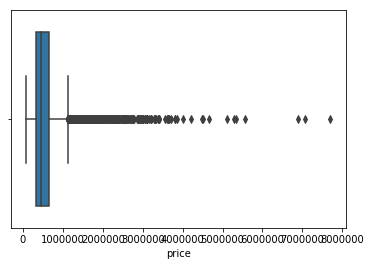

In [23]:
sns.boxplot( dataset.price )

#### Price is a highly skewed variable. Right skewed. Such variables can be tranformed using log tranformation, which might make the variable more normally distributed.

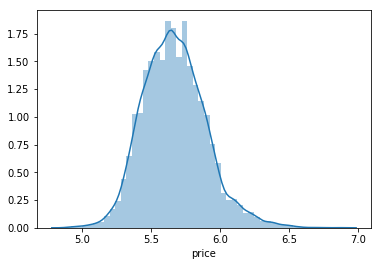

In [24]:
sns.distplot( np.log10( dataset.price ) )

## 3. State your insights.

#### Based on the correlation of features with target (price), the 5 features ['sqft_lot', 'condition',  'zipcode', 'long', 'sqft_lot15'] dont have significant correlation. 
#### Multicolinearity exists between 'bedrooms', 'bathrooms'. Lets combine these 2 into one feature.
#### Also multicolinearity exists between 'sqft_living', 'sqft_above' and 'sqft_living15'. Lets combine these 3 into one feature.
#### There are skewness and more outliers in the data. We are not treating outliers as we might end up losing/altering the whole data as the outliers are more.
#### At this point of time, we can't predict on best algorithm. Lets apply different algorithms and evaluate between models.

## 4. Build a linear regression model to predict the house prices

In [25]:
# Lets split the data to Train, Test

X = dataset.drop('price', axis=1)
y = dataset[['price']]

validation_size = 0.30
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

# As we have more skewness in the target, lets do log transform.
y_train = np.log(y_train)
y_test = np.log(y_test)

In [26]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.759208531691334

#### Lets check with other models too for better performance...

### Note:

#### Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The three algorithms selected include:
1. Linear Algorithms: Linear Regression (LR), Lasso Regression (Lasso), Ridge Regression (Ridge).
2. Nonlinear Algorithms: Classiffication and Regression Trees (CART) and k-Nearest Neighbors (KNN).
3. Ensembling Algorithms: Boosting Methods: AdaBoost (AB), GradientBoost, Bagging Methods: Random Forests (RF)

#### Let's use  default tuning parameters for the algorithms, 10-fold cross-validation and evaluate algorithms using R2 metric.


In [27]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'r2'  #'mean_squared_error'

In [28]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('Lasso', Lasso(alpha=0.0001, max_iter=10e5)))
#models.append(('Ridge', Ridge(alpha=100)))
models.append(('AB', AdaBoostRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))

In [29]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.758100 (0.006822)
KNN: 0.490050 (0.006980)
CART: 0.772267 (0.008763)
AB: 0.749705 (0.012079)
RF: 0.872618 (0.006023)
GB: 0.877039 (0.006767)


In [30]:
results

[array([0.75870129, 0.74985214, 0.76283559, 0.75629428, 0.77488625,
        0.7525419 , 0.75310275, 0.76166725, 0.75756399, 0.7535563 ]),
 array([0.49563759, 0.48225724, 0.49100014, 0.48337919, 0.50088652,
        0.5001132 , 0.49198103, 0.47925245, 0.4890813 , 0.48691151]),
 array([0.78358022, 0.77225285, 0.77809604, 0.77226377, 0.77479713,
        0.773808  , 0.78294954, 0.76376166, 0.76887425, 0.75228766]),
 array([0.76322763, 0.75193074, 0.76099063, 0.72882946, 0.76659049,
        0.75289108, 0.74853677, 0.74056847, 0.75177559, 0.73171221]),
 array([0.88218103, 0.87104294, 0.87592334, 0.86100889, 0.8814117 ,
        0.8737665 , 0.87384073, 0.87052173, 0.86788624, 0.86859467]),
 array([0.8819675 , 0.87859249, 0.87828173, 0.87287592, 0.88936133,
        0.86750218, 0.88055269, 0.8751426 , 0.86524833, 0.88086607])]

#### We have better score with GradientBoost as of now. KNN has the least score. Lets try to improve the model by feature engineering...

## 5. Try to find out important features or create new features to improve the performance for your model.

#### As the first step lets create new features and standardize the data to reduce the effect of different distributions.

In [31]:
# Create a new feature sqft and rooms based on the insights given above...
X_train_FI = X_train.copy(deep=True)
X_train_FI['sqft'] = ((X_train_FI['sqft_living'] + X_train_FI['sqft_above'] + X_train_FI['sqft_living15'])/3)

# Drop the old features having only the new features formed with them.
X_train_FI.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

X_train_FI.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_lot15,age,sqft
5098,3,2.25,11319,2.0,0,0,4,8,0,98072,47.7420,-122.105,11319,36,2026.666667
17829,3,2.50,2053,3.0,0,0,3,8,0,98117,47.6758,-122.386,4150,9,1350.000000
6888,4,2.50,5564,2.0,0,0,3,7,0,98056,47.4814,-122.189,5626,14,2730.000000
7964,4,2.50,9185,2.0,0,0,3,9,0,98029,47.5738,-121.992,8505,25,2723.333333
17394,1,0.75,9750,1.0,0,0,2,4,0,98146,47.4982,-122.362,9924,66,836.666667


In [32]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_FI, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.758060 (0.006780)
KNN: 0.463161 (0.015066)
CART: 0.778621 (0.010494)
AB: 0.748498 (0.009854)
RF: 0.874512 (0.006909)
GB: 0.877830 (0.006321)


## Observation: 
#### GB has the best score.
#### After adding new feature 'sqft' GB score is increasing/decreasing slightly which is negligible. As by introducing this new feature, and by dropping the old, we have actualy done dimensionality reduction. So lets have the changes eventhough there is only slight increase in accuracy. 

In [33]:
# Lets preserve the change to the original train set first...
X_train = X_train_FI.copy(deep=True)

# Create a new feature sqft and rooms based on the insights given above...
X_train_FI['rooms'] = (X_train_FI['bedrooms'] + X_train_FI['bathrooms'])

# Drop the old features having only the new features formed with them.
X_train_FI.drop(['bedrooms', 'bathrooms'], axis=1, inplace=True)

X_train_FI.head()

,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_lot15,age,sqft,rooms
5098,11319,2.0,0,0,4,8,0,98072,47.7420,-122.105,11319,36,2026.666667,5.25
17829,2053,3.0,0,0,3,8,0,98117,47.6758,-122.386,4150,9,1350.000000,5.50
6888,5564,2.0,0,0,3,7,0,98056,47.4814,-122.189,5626,14,2730.000000,6.50
7964,9185,2.0,0,0,3,9,0,98029,47.5738,-121.992,8505,25,2723.333333,6.50
17394,9750,1.0,0,0,2,4,0,98146,47.4982,-122.362,9924,66,836.666667,1.75


In [34]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_FI, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.756325 (0.007278)
KNN: 0.463161 (0.015066)
CART: 0.779865 (0.010705)
AB: 0.750447 (0.010504)
RF: 0.875027 (0.005604)
GB: 0.877941 (0.006538)


## Observation:
#### GB has the best score.
#### But after adding new feature 'rooms' GB score is increasing/decreasing slightly which is negligible. As by introducing this new feature, and by dropping the old, we have actualy done dimensionality reduction. So lets have the changes eventhough there is only slight increase in accuracy. 

In [35]:
# Lets preserve the change to the original train set first...
X_train = X_train_FI.copy(deep=True)

# As the sqft_basement has values(sqft) only where there is basement. That value is not going to have much sense.
# Instead of having sqft value convert it of 1, which means this feature will represent whether the house has
# basement or not. After imputing, lets convert the datatype to category.
X_train_FI.loc[X_train_FI['sqft_basement'] > 0, 'sqft_basement'] = 1
X_train_FI['sqft_basement'] = X_train_FI['sqft_basement'].astype('category')

X_train_FI.head()

,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_lot15,age,sqft,rooms
5098,11319,2.0,0,0,4,8,0,98072,47.7420,-122.105,11319,36,2026.666667,5.25
17829,2053,3.0,0,0,3,8,0,98117,47.6758,-122.386,4150,9,1350.000000,5.50
6888,5564,2.0,0,0,3,7,0,98056,47.4814,-122.189,5626,14,2730.000000,6.50
7964,9185,2.0,0,0,3,9,0,98029,47.5738,-121.992,8505,25,2723.333333,6.50
17394,9750,1.0,0,0,2,4,0,98146,47.4982,-122.362,9924,66,836.666667,1.75


In [36]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_FI, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.758777 (0.006607)
KNN: 0.434237 (0.015505)
CART: 0.780683 (0.010510)
AB: 0.750295 (0.009416)
RF: 0.875219 (0.005747)
GB: 0.877842 (0.006384)


## Observation:
#### GB has the best score. But after the changes in feature 'sqft_basement' GB score has decreased slightly which is negligible. As it has decreased the accuracy, lets not do this feature engineering.

In [37]:
# Lets revert back...
X_train_FI = X_train.copy(deep=True)

# Standardizing with zscore
X_train_FI = X_train_FI.apply(zscore)

In [38]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_FI, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.756325 (0.007278)
KNN: 0.832039 (0.008835)
CART: 0.778600 (0.011733)
AB: 0.749172 (0.010750)
RF: 0.872971 (0.006648)
GB: 0.877871 (0.006520)


In [39]:
X_train = X_train_FI.copy(deep=True)
X_train.head()

,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_lot15,age,sqft,rooms
5098,-0.092866,0.955279,-0.086749,-0.307711,0.894653,0.279722,-0.661944,-0.103165,1.311304,0.762125,-0.058234,-0.174810,0.095060,-0.159420
17829,-0.324085,2.818423,-0.086749,-0.307711,-0.633367,0.279722,-0.661944,0.740980,0.832302,-1.227813,-0.313578,-1.115586,-0.797305,0.007815
6888,-0.236473,0.955279,-0.086749,-0.307711,-0.633367,-0.566153,-0.661944,-0.403306,-0.574315,0.167268,-0.261006,-0.941368,1.022593,0.676754
7964,-0.146116,0.955279,-0.086749,-0.307711,-0.633367,1.125596,-0.661944,-0.909793,0.094262,1.562350,-0.158462,-0.558089,1.013801,0.676754
17394,-0.132018,-0.907866,-0.086749,-0.307711,-2.161387,-3.103775,-0.661944,1.284984,-0.452755,-1.057854,-0.107921,0.870497,-1.474272,-2.500706


## Observations:

#### GB has the best score. But there is no significant effect of standardization with GradientBoost model. But KNN accuracy have increased drastically after standardization.

#### This featurization and standardization doesnt have much effect with Linear Regression and DecisionTree models. The model didnt improve much.

## To Conclude...

#### We have introduced 2 new features and removed the old features used to create the new one.
#### We have done zscore standardization with features.
#### GradientBoost algorithm has given best scores. Lets explore further with GradientBoost algorithm.

In [40]:
# Lets do the same featurization for X_test.
X_test['sqft'] = ((X_test['sqft_living'] + X_test['sqft_above'] + X_test['sqft_living15'])/3)

# Drop the old features having only the new features formed with them.
X_test.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)


# Create a new feature sqft and rooms based on the insights given above...
X_test['rooms'] = (X_test['bedrooms'] + X_test['bathrooms'])

# Drop the old features having only the new features formed with them.
X_test.drop(['bedrooms', 'bathrooms'], axis=1, inplace=True)


X_test = X_test.apply(zscore)

X_test.head()

,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_lot15,age,sqft,rooms
957,-0.009278,-0.933448,-0.088154,-0.301178,0.938585,-0.541745,-0.651197,-0.685297,-1.407520,1.128670,0.192969,0.352535,0.132677,-0.502126
14143,-0.231129,-0.019591,-0.088154,-0.301178,0.938585,-0.541745,1.005287,1.205587,0.135086,-0.537083,-0.288745,1.762696,0.020597,0.358556
19452,0.126422,-0.933448,-0.088154,-0.301178,-3.735597,-5.718867,-0.651197,-1.018983,-0.197830,2.351176,0.413870,0.352535,-1.629210,-3.772718
20510,-0.311963,2.721980,-0.088154,-0.301178,-0.619476,0.321108,-0.651197,0.445526,0.646658,-0.837348,-0.435724,-1.160809,-0.763958,0.014283
18354,-0.290814,-0.933448,-0.088154,-0.301178,-0.619476,-1.404599,1.304375,0.705059,0.919304,-1.066121,-0.321809,-1.367174,-0.754991,0.358556


### Lets check the feature importance for the model

In [41]:
model = GradientBoostingRegressor(random_state=seed)
model.fit(X_train, y_train)
print (model.score(X_train, y_train))

0.8888535755674977


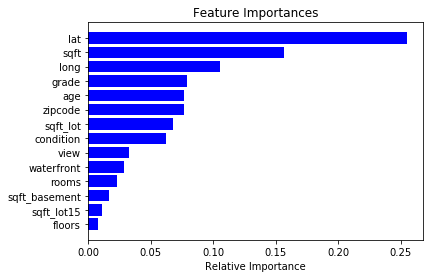

In [42]:
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [43]:
# Lets do feature selection using SequentialFeatureSelector with GradientBoost algorithm.
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [44]:
model = GradientBoostingRegressor(random_state=seed)

# Build step forward feature selection
sfs1 = sfs(model, k_features=14, forward=True, cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)
sfs1.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.50189718, 0.50677958, 0.5181286 , 0.49493604, 0.49124088]),
  'avg_score': 0.5025964541577166,
  'feature_names': ('grade',),
  'ci_bound': 0.012150807176291108,
  'std_dev': 0.009453740786010374,
  'std_err': 0.004726870393005187},
 2: {'feature_idx': (5, 7),
  'cv_scores': array([0.74369143, 0.73430928, 0.74954107, 0.74197149, 0.72970131]),
  'avg_score': 0.7398429144437649,
  'feature_names': ('grade', 'zipcode'),
  'ci_bound': 0.00903129576388424,
  'std_dev': 0.007026654927102238,
  'std_err': 0.0035133274635511195},
 3: {'feature_idx': (5, 7, 12),
  'cv_scores': array([0.81190673, 0.80750068, 0.81996693, 0.80819862, 0.79337267]),
  'avg_score': 0.8081891246534723,
  'feature_names': ('grade', 'zipcode', 'sqft'),
  'ci_bound': 0.011094356828777387,
  'std_dev': 0.008631786524554153,
  'std_err': 0.004315893262277076},
 4: {'feature_idx': (5, 7, 8, 12),
  'cv_scores': array([0.85326745, 0.83829315, 0.84364739, 0.8429404 , 0.83339011

## Observations:

#### As per correlation matrix, sqft_lot and sqft_lot15 are correlated to each other (multi collinear). Based on the feature importance sqft_lot15 have very less importance. Also based on sequentialFeatureSelector result, the model have performed better without out sqft_lot15. 
### So lets drop sqft_lot15 and sqft_basement based on feature selection results and verify the model.
### Even though the floors have very less importance as per feature importance, in the real scenario the number of floors will have impact. So lets not drop it.

In [45]:
X_train_FI = X_train.drop(['sqft_lot15', 'sqft_basement'], axis=1, inplace=False)

model = GradientBoostingRegressor(random_state=seed)
model.fit(X_train_FI, y_train)
print (model.score(X_train_FI, y_train))

0.8893453817896994


The model performance have increased slightly.
Lets apply the changes to original X_train and X-test set.

In [46]:
X_train.drop(['sqft_lot15', 'sqft_basement'], axis=1, inplace=True)
X_test.drop(['sqft_lot15', 'sqft_basement'], axis=1, inplace=True)

In [47]:
# Lets verify the final train set.
X_train.head()

,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,age,sqft,rooms
5098,-0.092866,0.955279,-0.086749,-0.307711,0.894653,0.279722,-0.103165,1.311304,0.762125,-0.174810,0.095060,-0.159420
17829,-0.324085,2.818423,-0.086749,-0.307711,-0.633367,0.279722,0.740980,0.832302,-1.227813,-1.115586,-0.797305,0.007815
6888,-0.236473,0.955279,-0.086749,-0.307711,-0.633367,-0.566153,-0.403306,-0.574315,0.167268,-0.941368,1.022593,0.676754
7964,-0.146116,0.955279,-0.086749,-0.307711,-0.633367,1.125596,-0.909793,0.094262,1.562350,-0.558089,1.013801,0.676754
17394,-0.132018,-0.907866,-0.086749,-0.307711,-2.161387,-3.103775,1.284984,-0.452755,-1.057854,0.870497,-1.474272,-2.500706


In [48]:
# Lets verify the final test set.
X_test.head()

,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,age,sqft,rooms
957,-0.009278,-0.933448,-0.088154,-0.301178,0.938585,-0.541745,-0.685297,-1.407520,1.128670,0.352535,0.132677,-0.502126
14143,-0.231129,-0.019591,-0.088154,-0.301178,0.938585,-0.541745,1.205587,0.135086,-0.537083,1.762696,0.020597,0.358556
19452,0.126422,-0.933448,-0.088154,-0.301178,-3.735597,-5.718867,-1.018983,-0.197830,2.351176,0.352535,-1.629210,-3.772718
20510,-0.311963,2.721980,-0.088154,-0.301178,-0.619476,0.321108,0.445526,0.646658,-0.837348,-1.160809,-0.763958,0.014283
18354,-0.290814,-0.933448,-0.088154,-0.301178,-0.619476,-1.404599,0.705059,0.919304,-1.066121,-1.367174,-0.754991,0.358556


## 6. Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

#### Now lets tune GB parameter to make it perform even better.

The default number of estimaters is 10. 

This is a good candidate parameter of GB to tune. 

Often, the larger the number of estimators, the better the performance but the longer the training time. 

Now we will look at tuning the number of estimators for GB. 

Below we define a parameter grid n-estimators values from 10 to 100 in increments of 10. 

Each setting is evaluated using 10-fold cross-validation.

In [49]:
# Parameters for RF
param_grid = dict(n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])) #, min_samples_leaf = [1,5,10,50,100,200,500]

In [50]:
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(X_train, y_train)

In [51]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.877377 using {'n_estimators': 100}
0.639461 (0.007766) with: {'n_estimators': 10}
0.777161 (0.008346) with: {'n_estimators': 20}
0.822810 (0.007986) with: {'n_estimators': 30}
0.843358 (0.008240) with: {'n_estimators': 40}
0.855143 (0.007675) with: {'n_estimators': 50}
0.862849 (0.007574) with: {'n_estimators': 60}
0.868347 (0.006987) with: {'n_estimators': 70}
0.872023 (0.006724) with: {'n_estimators': 80}
0.874850 (0.006751) with: {'n_estimators': 90}
0.877377 (0.006694) with: {'n_estimators': 100}


### Observations:

#### GradientBoost algorithm with the parameter ('n_estimators': 100) have given the best accuracy of 0.877377.

In [52]:
model = GradientBoostingRegressor(random_state=seed, n_estimators = 100)
scoresTrain = cross_val_score(model, X_train, y_train, cv=10)
print("Train Accuracy Score: %0.2f (+/- %0.2f)" % (scoresTrain.mean(), scoresTrain.std()))
print("\nTrain Scores:\n", scoresTrain)

Train Accuracy Score: 0.88 (+/- 0.01)

Train Scores:
 [0.88519745 0.87598353 0.88195358 0.87165286 0.88882414 0.86835225
 0.8759512  0.87635888 0.86761257 0.88188459]


In [53]:
model = GradientBoostingRegressor(random_state=seed, n_estimators = 100)
model.fit(X_train, y_train)
print ("Train accuracy without crossval: ", model.score(X_train, y_train))

Train accuracy without crossval:  0.8893453817896994


In [54]:
print ("Test accuracy score: ", model.score(X_test,y_test))

Test accuracy score:  0.8808249674232724


## Observations:

### GradientBoost model with paramenter (n_estimators = 100) has given the best result of 0.88 (+/- 0.01) accuracy.
### Test Accuracy Score: 0.88

In [55]:
# Lets try clustering in the dataset as we have seen gaussian mix in data.

In [56]:
from sklearn.cluster import KMeans

In [57]:
y_train.head()

,price
5098,13.079456
17829,13.075272
6888,12.959727
7964,13.337475
17394,11.884489


In [58]:
#y_train_df = pd.Series(y_train, name='price')
TrainCluster = pd.concat([X_train, y_train], axis=1)
TrainCluster.head()

,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,age,sqft,rooms,price
5098,-0.092866,0.955279,-0.086749,-0.307711,0.894653,0.279722,-0.103165,1.311304,0.762125,-0.174810,0.095060,-0.159420,13.079456
17829,-0.324085,2.818423,-0.086749,-0.307711,-0.633367,0.279722,0.740980,0.832302,-1.227813,-1.115586,-0.797305,0.007815,13.075272
6888,-0.236473,0.955279,-0.086749,-0.307711,-0.633367,-0.566153,-0.403306,-0.574315,0.167268,-0.941368,1.022593,0.676754,12.959727
7964,-0.146116,0.955279,-0.086749,-0.307711,-0.633367,1.125596,-0.909793,0.094262,1.562350,-0.558089,1.013801,0.676754,13.337475
17394,-0.132018,-0.907866,-0.086749,-0.307711,-2.161387,-3.103775,1.284984,-0.452755,-1.057854,0.870497,-1.474272,-2.500706,11.884489


In [59]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5, random_state=1)
  clusters.fit(TrainCluster)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,148918.876447
1,3,131557.824943
2,4,116565.279821
3,5,107361.248406
4,6,98631.798703
5,7,90235.159268
6,8,85910.077474
7,9,79200.736597


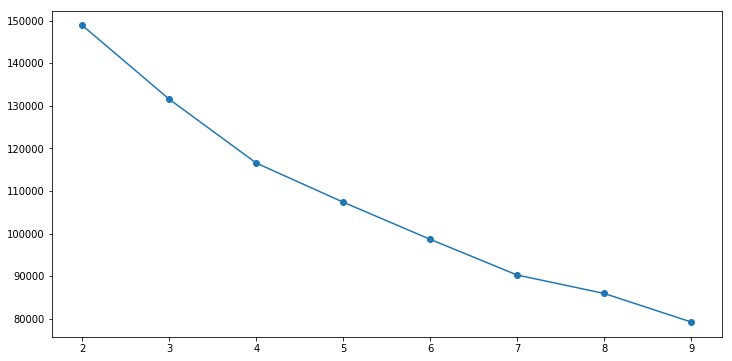

In [60]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [61]:
# Lets consider 4 clusters
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(TrainCluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [62]:
prediction=cluster.predict(TrainCluster)
TrainCluster["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E830B8C518>,
      dtype=object)

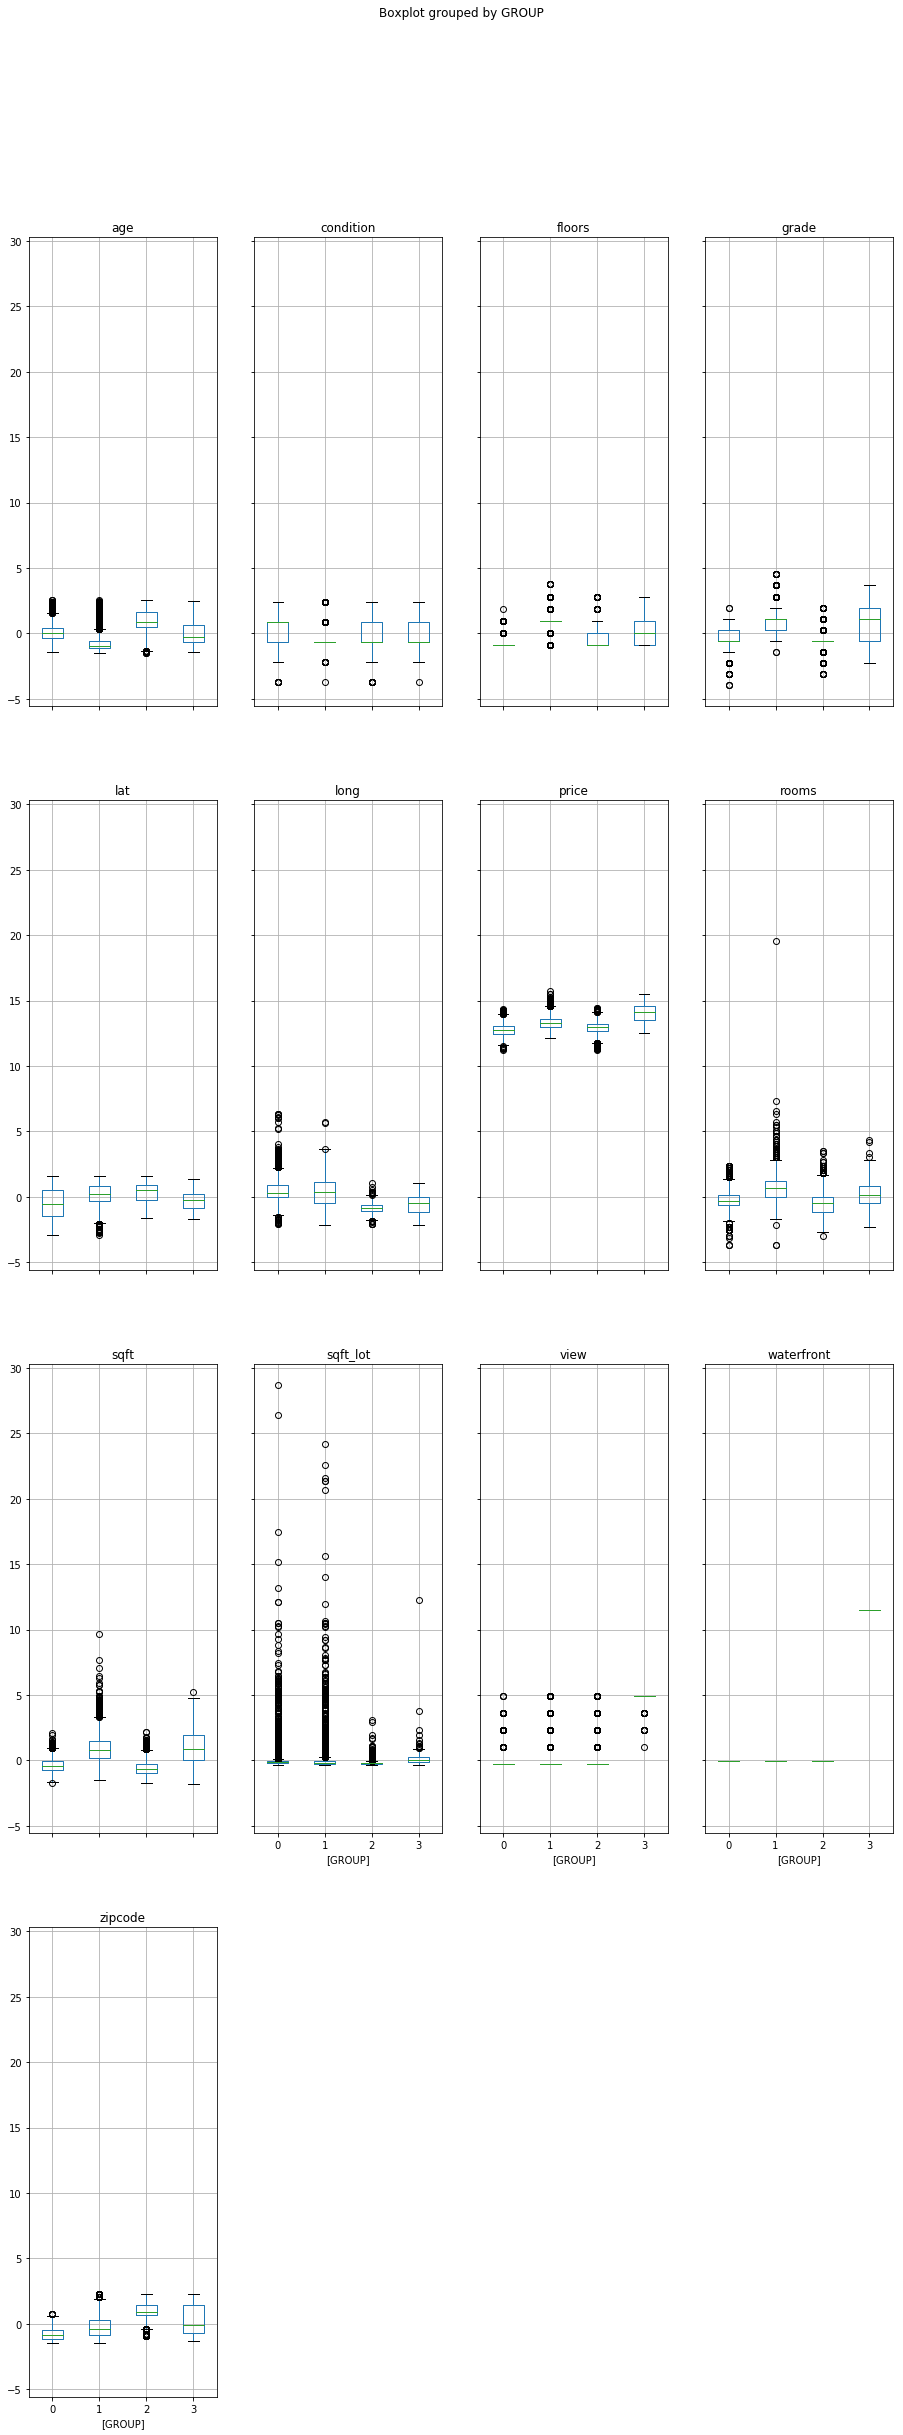

In [63]:
TrainCluster.boxplot(by = 'GROUP',  layout=(4,4), figsize=(15, 40))

In [64]:
TrainCluster.groupby("GROUP").count()

,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,age,sqft,rooms,price
GROUP,,,,,,,,,,,,,
0,4715,4715,4715,4715,4715,4715,4715,4715,4715,4715,4715,4715,4715
1,5382,5382,5382,5382,5382,5382,5382,5382,5382,5382,5382,5382,5382
2,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919
3,113,113,113,113,113,113,113,113,113,113,113,113,113


In [65]:
TrainCluster_Group1 = TrainCluster[(TrainCluster['GROUP'] == 0)]

In [66]:
TrainCluster_Group1.head()

,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,age,sqft,rooms,price,GROUP
11184,-0.233953,-0.907866,-0.086749,-0.307711,-0.633367,-0.566153,-1.022345,-1.817406,-1.022446,-0.453558,-0.829835,-0.326654,12.323856,0
2273,5.034031,-0.907866,-0.086749,-0.307711,-0.633367,0.279722,0.272010,-1.923047,0.896676,-0.453558,0.710485,-0.326654,13.235692,0
18487,-0.164457,-0.907866,-0.086749,-0.307711,-0.633367,-0.566153,-0.834758,0.923472,0.188513,0.382687,-1.034683,-0.995593,12.807653,0
6689,0.005127,-0.907866,-0.086749,-0.307711,-0.633367,-1.412027,-0.140683,-0.897750,-1.773099,-0.871681,-0.599490,-0.493889,12.594731,0
13346,-0.175586,0.955279,-0.086749,-0.307711,-0.633367,-0.566153,-0.815999,1.078315,-0.031018,-0.418715,-0.836868,-0.159420,12.834681,0


In [67]:
X_train_Clus1 = TrainCluster_Group1.drop(['GROUP','price'], axis=1)
y_train_Clus1 = TrainCluster_Group1['price']

In [68]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('AB', AdaBoostRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))

In [69]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_Clus1, y_train_Clus1, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.696799 (0.023026)
KNN: 0.784973 (0.019557)
CART: 0.710304 (0.014611)
AB: 0.746990 (0.012934)
RF: 0.824224 (0.013497)
GB: 0.840362 (0.010681)


## Observations:

### The data is not spreaded evenly among clusters, The 4th cluster have very less data. This might be due to outliers. 
### The models also didnt perform better with clusters. The models have performed better without clustering.

## Lets try with PCA

In [70]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28


In [71]:
#dataset.drop(['id','date'], axis=1, inplace = True)

# Standardize the data.
# Split the data to Train, Test and then standardize so that the test set will not have impact on train set.

X = dataset.drop('price', axis=1)
y = dataset[['price']]

validation_size = 0.30
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

# Standardizing with zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

# As we have more skewness in the target, lets do log transform.
y_train = np.log(y_train)
y_test = np.log(y_test)

In [72]:
# Lets try PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
Explained_Variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_
print("Explianed Variance Ratio:\n", Explained_Variance)
print("\nSingular Values:\n", singular_values)

Explianed Variance Ratio:
 [3.09603659e-01 1.25430253e-01 1.09229421e-01 7.90773843e-02
 7.15054939e-02 5.26613154e-02 4.94346600e-02 3.89631861e-02
 3.65099446e-02 2.97060125e-02 2.37686456e-02 1.98287991e-02
 1.54177590e-02 1.46996183e-02 1.28956704e-02 1.12681787e-02
 1.29058327e-33]

Singular Values:
 [2.82184149e+02 1.79610086e+02 1.67609792e+02 1.42611885e+02
 1.35612361e+02 1.16379215e+02 1.12757476e+02 1.00105238e+02
 9.69025397e+01 8.74081145e+01 7.81865031e+01 7.14130823e+01
 6.29709431e+01 6.14869004e+01 5.75905908e+01 5.38339732e+01
 1.82189183e-14]


In [73]:
tot = sum(Explained_Variance)
var_exp = [( i /tot ) * 100 for i in sorted(Explained_Variance, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.9603659   43.50339117  54.42633322  62.33407165  69.48462104
  74.75075258  79.69421858  83.59053719  87.24153165  90.21213291
  92.58899747  94.57187737  96.11365327  97.5836151   98.87318213
 100.         100.        ]


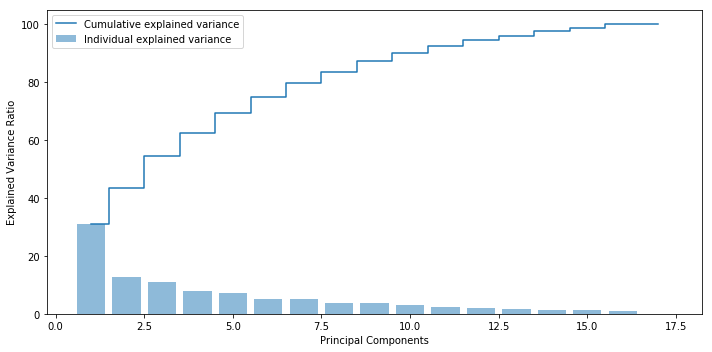

In [74]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, Explained_Variance.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, Explained_Variance.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [75]:
# Create a PCA that will retain 98% of the variance (2 PC will be dropped. 
# So we will be considering only 15 PC's instead of 17 PC's)
pca = PCA(n_components=.98)
pca.fit(X_train)

# Conduct PCA
X_train_pca = pca.transform(X_train)

In [76]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('AB', AdaBoostRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))

In [77]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.755763 (0.006723)
KNN: 0.824996 (0.008971)
CART: 0.647339 (0.013631)
AB: 0.666359 (0.014855)
RF: 0.822554 (0.011419)
GB: 0.802699 (0.008379)


### Observations:
#### PCA is not performing better with this data. May be due to presence of more outliers.

## Final Conclusion:

### GradientBoost model (n_estimator = 100) have performed better with the accuracy rate of  0.88 (+/- 0.01).
### PCA and Clustering is not doing better with the data. May be due to presence of more outliers.

### Below are the Feature Engineering Done...
--> combined date, yr_renovated, yr_build to get new feature age (year(date) -  max(yr_built, yr_renovated))

--> As multicolinearity exists between 'bedrooms', 'bathrooms', these 2 are combined into one feature. rooms = bedrooms + bathrooms.

--> As multicolinearity exists between 'sqft_living', 'sqft_above' and 'sqft_living15', these 3 are combined into one feature. sqft = sqft_living + sqft_above + sqft_living15

--> Based on feature importance and sequential feature selection, we have dropped sqft_lot15 and sqft_basement.

--> By doing the above we have reduced the dimention from 19 to 12.

--> We have standardized the features with zscore.

--> Log transformation for the target variable was done, as the data was highly skewed (right).
